In [25]:
# load packages to visualize yolo bbox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

import os
import json

# load detected objects df
df = pd.read_csv('../Data/Output/YOLO_output/detections.csv')

df.head()

,segment_id,img_id,object_id,confidence,bbox_size,x1,y1,x2,y2,class
0,104197837-271197326,h1_009,0,0.9183,74265.74,399.3403,279.4324,639.5289,588.6301,truck
1,104197837-271197326,h1_007,0,0.9593,88640.84,18.9590,391.8408,430.2413,607.3639,car
2,104197837-271197326,h1_013,0,0.9095,84736.62,0.5696,189.2771,253.1547,524.7546,truck
3,104197837-271197326,h1_013,1,0.7939,1912.87,369.3296,338.6563,401.4716,398.1696,person
4,104197837-271197326,h1_013,2,0.7383,1495.24,289.6362,329.1837,316.0912,385.7040,person


In [26]:
# Load images.txt, with END as the last line
im_path  = os.path.join(  '../Data', 'ProcessedData', 'SFStreetView', 'Res_640', 'PittsburghDowntown_2024-03-20', 'images.txt' )

images = pd.read_csv(im_path, sep=' ', header=None)

# rename columns 
cols = ['segment_id', 'filename', 'image_panoid', 'date', 'query_counter', 'lat', 'lon', 'end']
images.columns = cols
images.drop('end', axis=1, inplace=True)

# Extract last 6 characters before ".png" as img_id
images['img_id'] = images['filename'].apply(lambda x: x[-10:-4])

images

,segment_id,filename,image_panoid,date,query_counter,lat,lon,img_id
0,104197837-271197326,img_104197837-271197326_h0_000.png,XZchyShAmSwoUzzFIw9cpg,2022-07-01,0.0,40.447302,-80.007539,h0_000
1,104197837-271197326,img_104197837-271197326_h1_001.png,XZchyShAmSwoUzzFIw9cpg,2022-07-01,1.0,40.447302,-80.007539,h1_001
2,104197837-271197326,NotSaved,XZchyShAmSwoUzzFIw9cpg,2022-07-01,2.0,40.447302,-80.007539,NotS
3,104197837-271197326,NotSaved,XZchyShAmSwoUzzFIw9cpg,2022-07-01,3.0,40.447302,-80.007539,NotS
4,104197837-271197326,img_104197837-271197326_h0_002.png,MYVzgzIApVIb2Z7Cdbou3w,2022-07-01,4.0,40.447208,-80.007510,h0_002
...,...,...,...,...,...,...,...,...
27866,105116527-10970185374,NotSaved,86NWZiQxDKwRr4gDGKld8A,2023-10-01,27.0,40.437913,-80.004374,NotS
27867,105116527-10970185374,img_105116527-10970185374_h0_004.png,WxPeiIxfXMlduvcaRHFCtQ,2023-10-01,28.0,40.437737,-80.003904,h0_004
27868,105116527-10970185374,img_105116527-10970185374_h1_005.png,WxPeiIxfXMlduvcaRHFCtQ,2023-10-01,29.0,40.437737,-80.003904,h1_005
27869,105116527-10970185374,NotSaved,WxPeiIxfXMlduvcaRHFCtQ,2023-10-01,30.0,40.437737,-80.003904,NotS


In [27]:
# merge images and df on segment_id and img_id
df = df.merge(images, on=['segment_id', 'img_id'], how='left')
df

,segment_id,img_id,object_id,confidence,bbox_size,x1,y1,x2,y2,class,filename,image_panoid,date,query_counter,lat,lon
0,104197837-271197326,h1_009,0,0.9183,74265.74,399.3403,279.4324,639.5289,588.6301,truck,img_104197837-271197326_h1_009.png,AQZQmcEju6SveGJxIojEbw,2022-07-01,19.0,40.446924,-80.007422
1,104197837-271197326,h1_007,0,0.9593,88640.84,18.9590,391.8408,430.2413,607.3639,car,img_104197837-271197326_h1_007.png,UGj7aBRoVd0Bm66NvxGjqw,2022-07-01,15.0,40.447012,-80.007449
2,104197837-271197326,h1_013,0,0.9095,84736.62,0.5696,189.2771,253.1547,524.7546,truck,img_104197837-271197326_h1_013.png,APNp8vUAx7ihL9gj-i5tCg,2022-07-01,29.0,40.446741,-80.007365
3,104197837-271197326,h1_013,1,0.7939,1912.87,369.3296,338.6563,401.4716,398.1696,person,img_104197837-271197326_h1_013.png,APNp8vUAx7ihL9gj-i5tCg,2022-07-01,29.0,40.446741,-80.007365
4,104197837-271197326,h1_013,2,0.7383,1495.24,289.6362,329.1837,316.0912,385.7040,person,img_104197837-271197326_h1_013.png,APNp8vUAx7ihL9gj-i5tCg,2022-07-01,29.0,40.446741,-80.007365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49199,105116527-10970185374,h0_000,2,0.6272,151.38,309.3169,322.9909,323.0086,334.0475,car,img_105116527-10970185374_h0_000.png,zetqk7qEuvpT82BgGoVgRw,2023-05-01,8.0,40.437957,-80.004160
49200,105116527-10970185374,h0_000,3,0.6000,217.79,171.8813,239.0577,182.6154,259.3474,traffic_light,img_105116527-10970185374_h0_000.png,zetqk7qEuvpT82BgGoVgRw,2023-05-01,8.0,40.437957,-80.004160
49201,105116527-10970185374,h0_000,4,0.5530,93.53,304.1447,267.6016,310.3760,282.6116,traffic_light,img_105116527-10970185374_h0_000.png,zetqk7qEuvpT82BgGoVgRw,2023-05-01,8.0,40.437957,-80.004160
49202,105116527-10970185374,h0_000,5,0.4986,86.66,321.0951,270.9250,330.8573,279.8021,traffic_light,img_105116527-10970185374_h0_000.png,zetqk7qEuvpT82BgGoVgRw,2023-05-01,8.0,40.437957,-80.004160


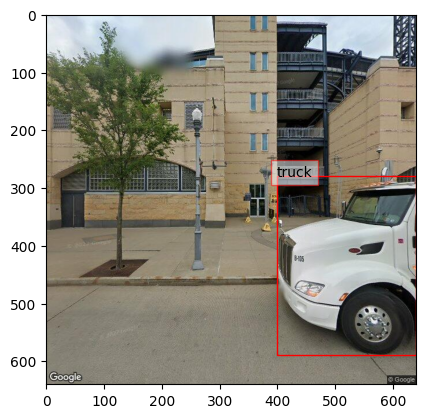

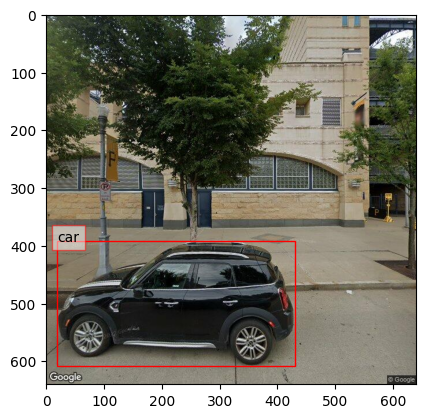

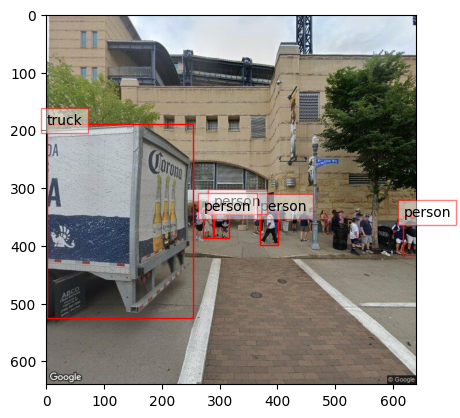

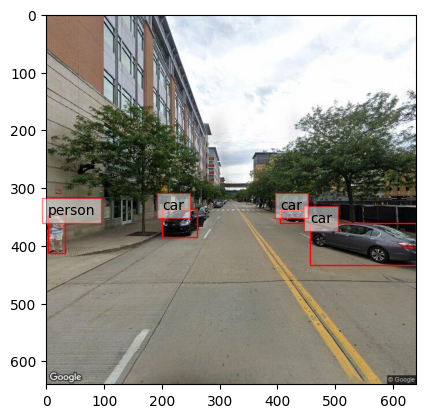

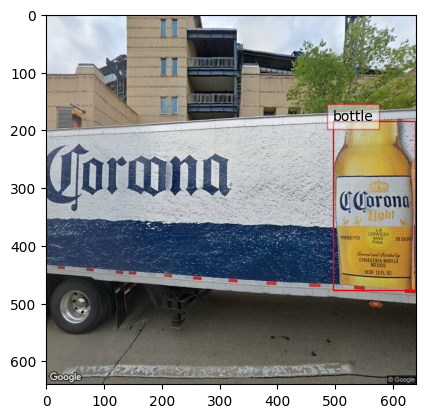

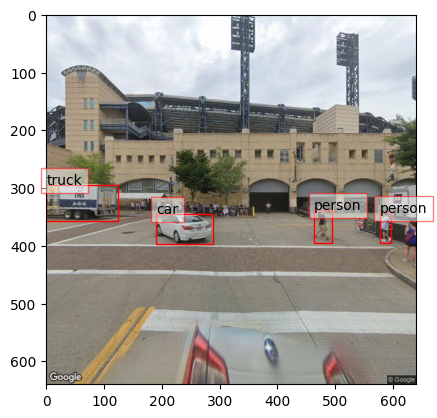

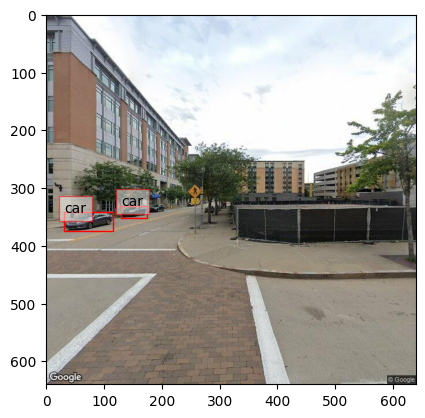

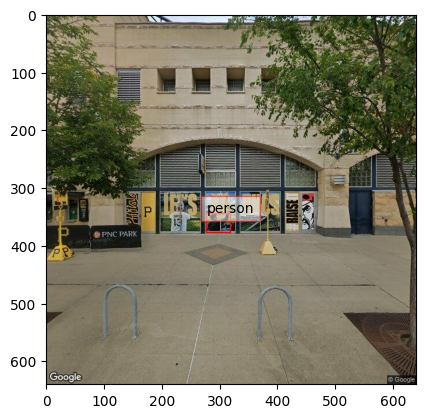

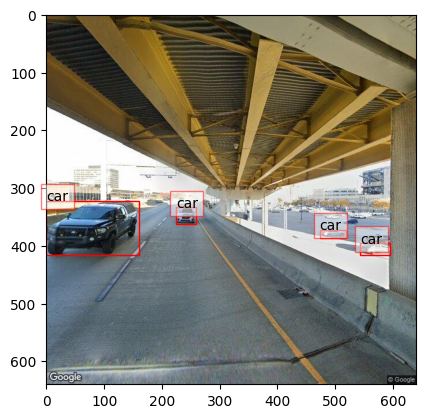

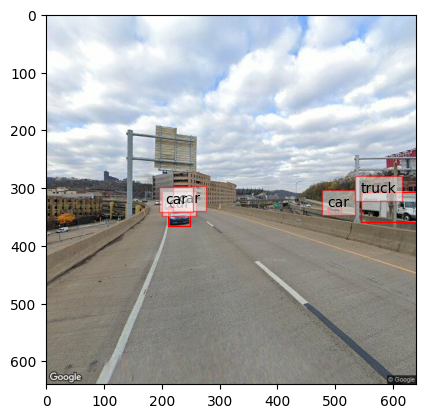

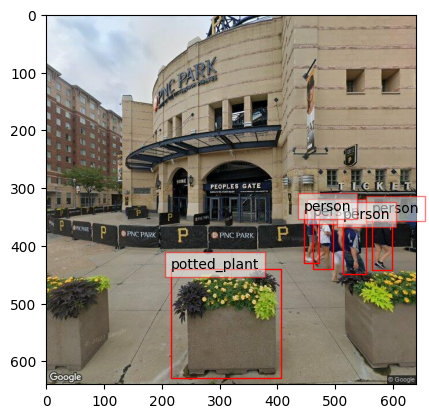

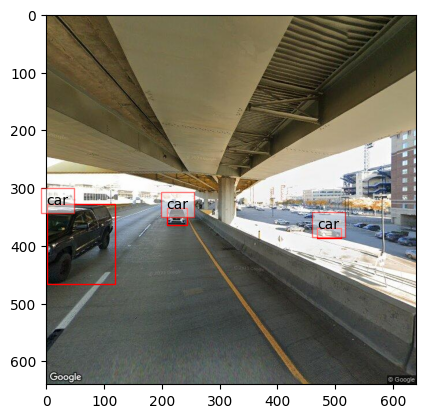

In [39]:

confidence_level = .7

counter = 0
# for each unique filename, plot all rows/images with bounding box, waiting for user input to continue
for filename in df['filename'].unique():
    # if file name is not "notsaved"
    if filename == 'NotSaved':
        continue

    # get all rows with the same filename
    df_temp = df[ (df['filename'] == filename)  ] 
    # filter on confidence level
    df_temp = df_temp[df_temp['confidence'] > confidence_level]

    # if there are rows, continue
    if len(df_temp) == 0:
        continue

    # load image
    im = Image.open(os.path.join('../Data/ProcessedData/SFStreetView/Res_640/PittsburghDowntown_2024-03-20', filename))
    # plot image
    fig, ax = plt.subplots()
    ax.imshow(im)
    # plot bbox - using x1,x2,y1,y2
    for i in range(len(df_temp)):
        x1 = df_temp.iloc[i]['x1']
        x2 = df_temp.iloc[i]['x2']
        y1 = df_temp.iloc[i]['y1']
        y2 = df_temp.iloc[i]['y2']
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        # add label from "class" column and confidence / bbox size
        
        t = plt.text(x1, y1, df_temp.iloc[i]['class'] + \
                 #' ' + str(round(df_temp.iloc[i]['confidence'], 3)) + \ ". Bbox: "  + str(round(df_temp.iloc[i]['bbox_size'], 1)), color='red')
                 '', color='black', backgroundcolor='white')
        t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='red'))

    plt.show()
    input('Press Enter to continue...')

    if counter > 10:
         break
    counter += 1



In [ ]:
#